In [369]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL','INFY','HDB']

# Set up End and Start times for data grab
tech_list = ['AAPL','INFY','HDB']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, INFY, HDB]
company_name = ["APPLE","INFY", "HDB"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-09,57.000000,57.029999,56.160000,56.169998,56.169998,1637700,HDB
2023-11-10,56.560001,57.389999,56.450001,57.320000,57.320000,2268300,HDB
2023-11-13,57.200001,57.430000,57.009998,57.180000,57.180000,1861300,HDB
2023-11-14,58.369999,59.060001,58.270000,58.700001,58.700001,2432100,HDB
2023-11-15,58.669998,58.970001,58.490002,58.520000,58.520000,1563400,HDB
2023-11-16,58.459999,58.610001,57.610001,57.790001,57.790001,1296300,HDB
2023-11-17,58.099998,58.270000,57.619999,58.139999,58.139999,1019800,HDB
2023-11-20,57.919998,58.410000,57.740002,58.270000,58.270000,1174900,HDB
2023-11-21,58.660000,59.270000,58.529999,58.849998,58.849998,2091100,HDB


In [370]:
HDB.describe

<bound method NDFrame.describe of                  Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2022-11-25  69.099998  69.830002  68.699997  69.519997  68.798180   584800   
2022-11-28  69.080002  69.080002  68.320000  68.589996  67.877838   933500   
2022-11-29  68.879997  69.269997  68.540001  69.239998  68.521088  1516100   
2022-11-30  69.379997  70.769997  69.360001  70.570000  69.837280  2125800   
2022-12-01  70.449997  70.680000  69.220001  69.550003  68.827881  1114700   
...               ...        ...        ...        ...        ...      ...   
2023-11-16  58.459999  58.610001  57.610001  57.790001  57.790001  1296300   
2023-11-17  58.099998  58.270000  57.619999  58.139999  58.139999  1019800   
2023-11-20  57.919998  58.410000  57.740002  58.270000  58.270000  1174900   
2023-11-21  58.660000  59.270000  58.529999  58.849998  58.849998  2091100   
2023-11-22  58.939999  59.0999

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [371]:
# Summary Stats
CIPLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [372]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-25 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

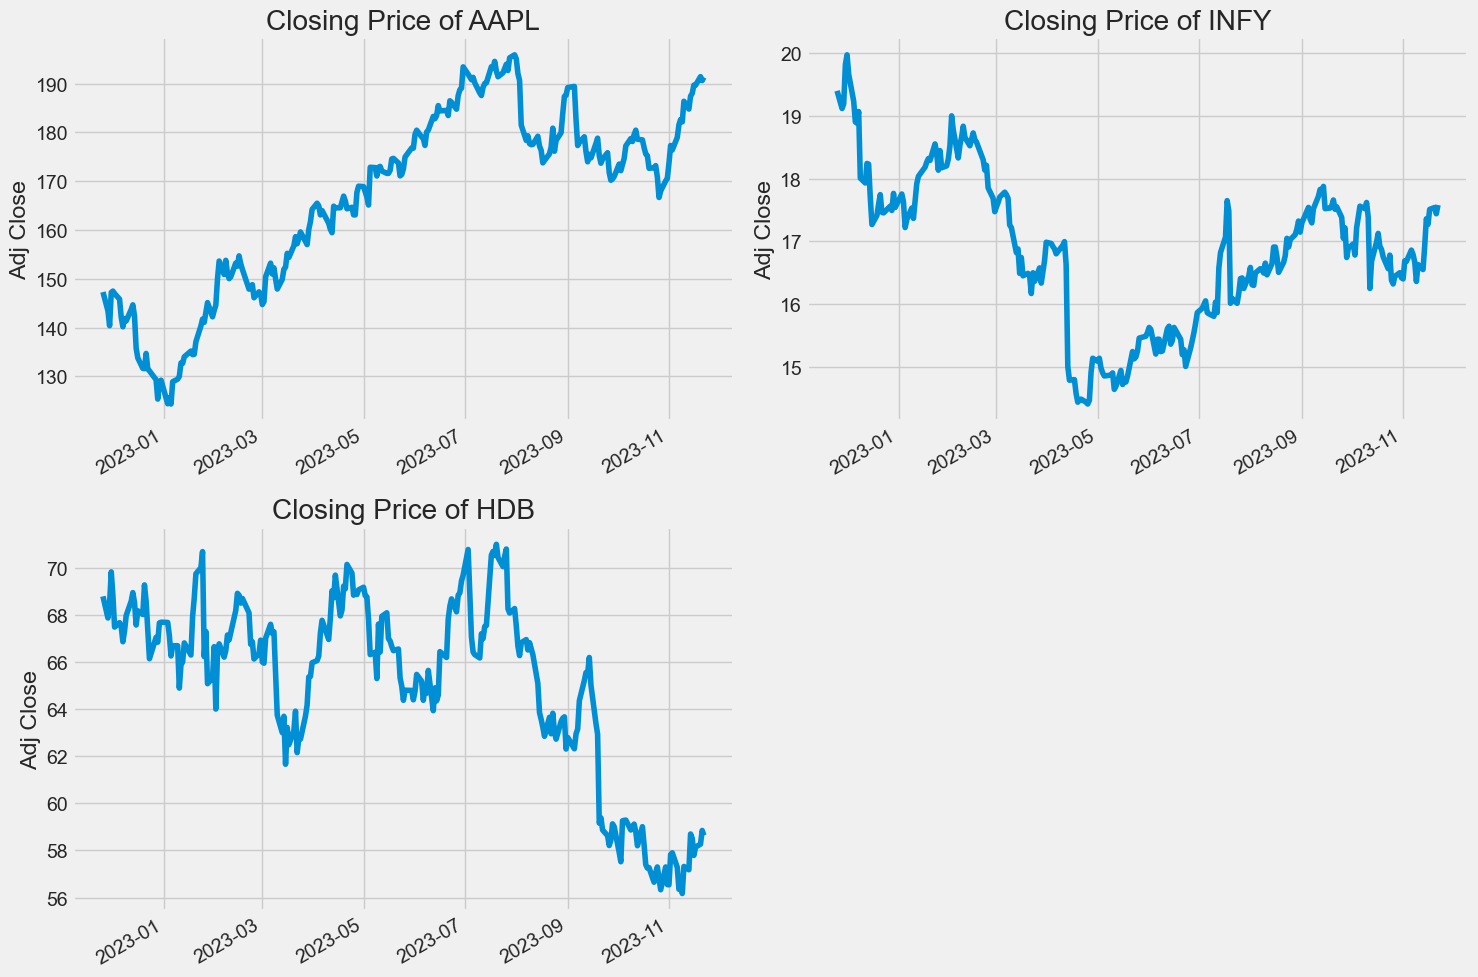

In [373]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

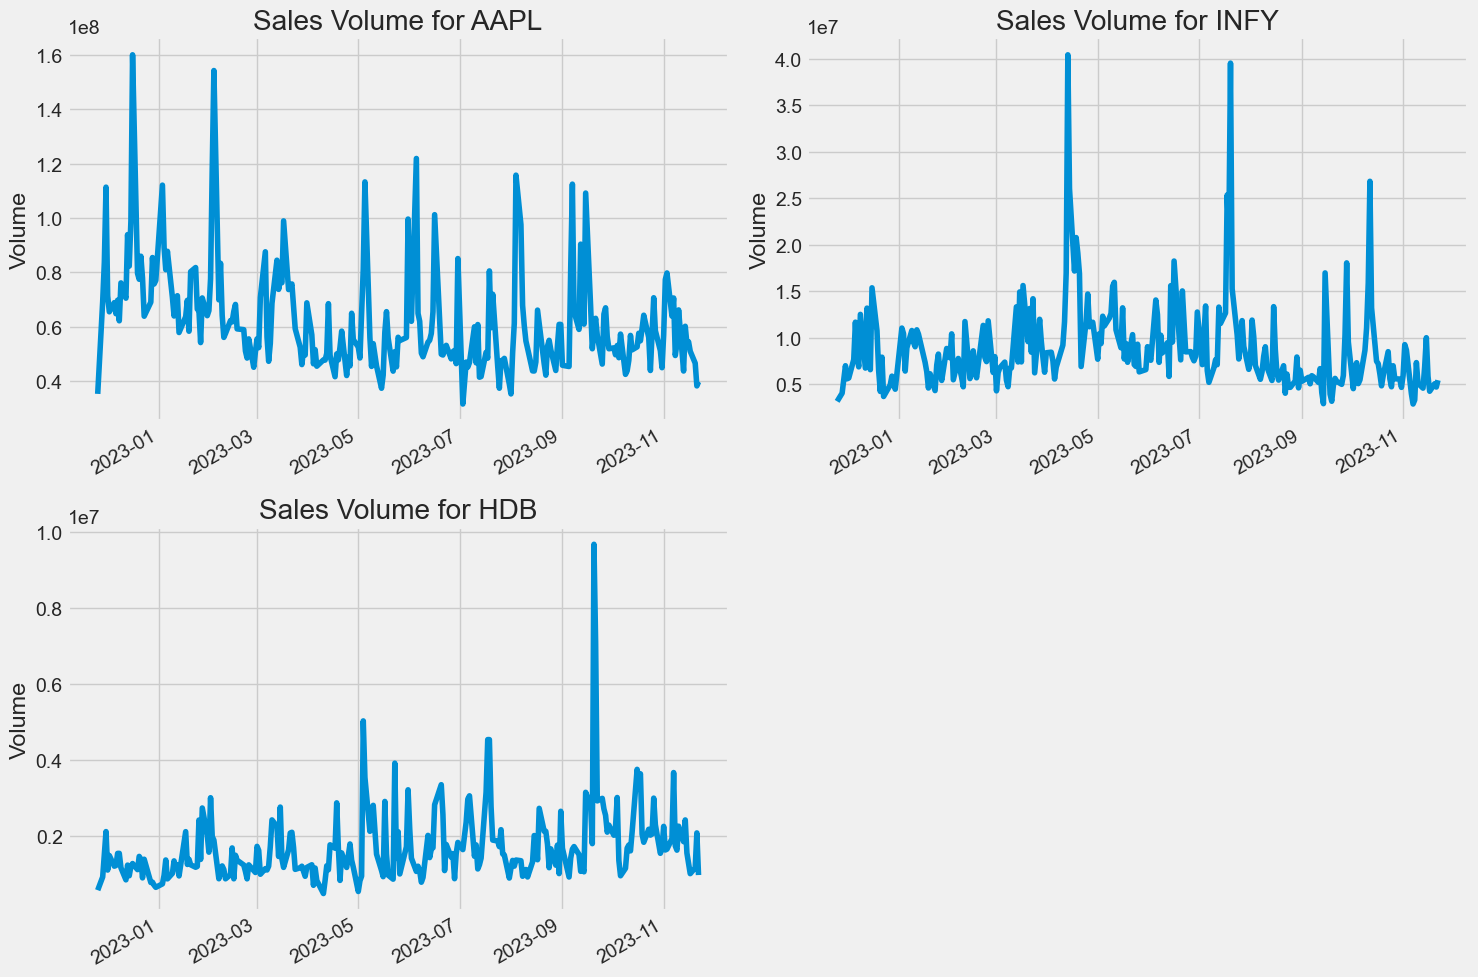

In [374]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

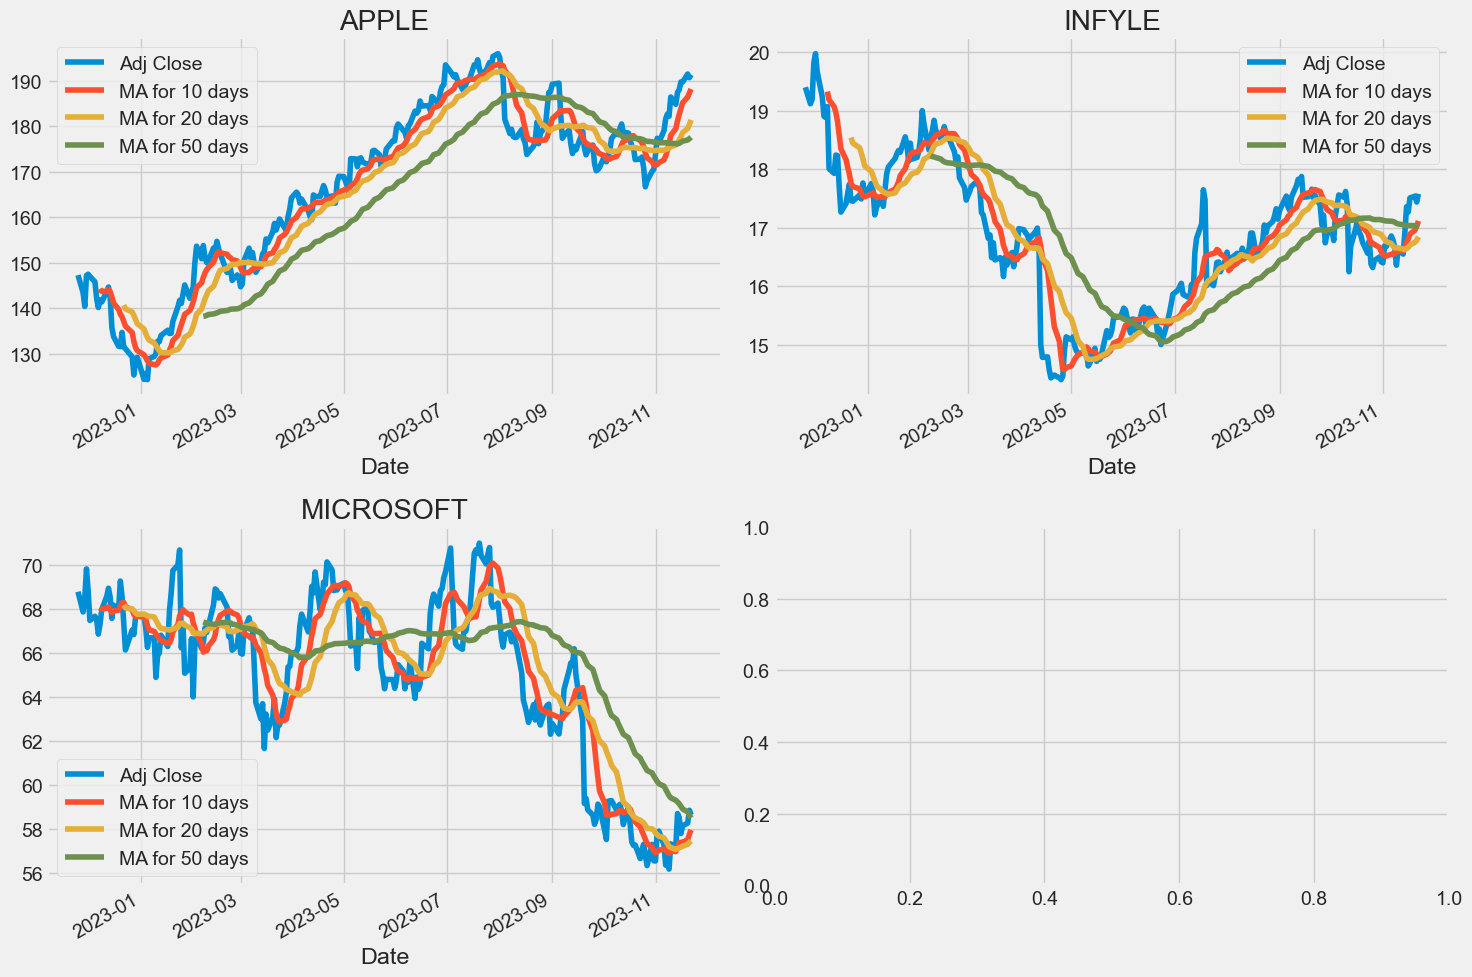

In [375]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

INFY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INFYLE')

HDB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

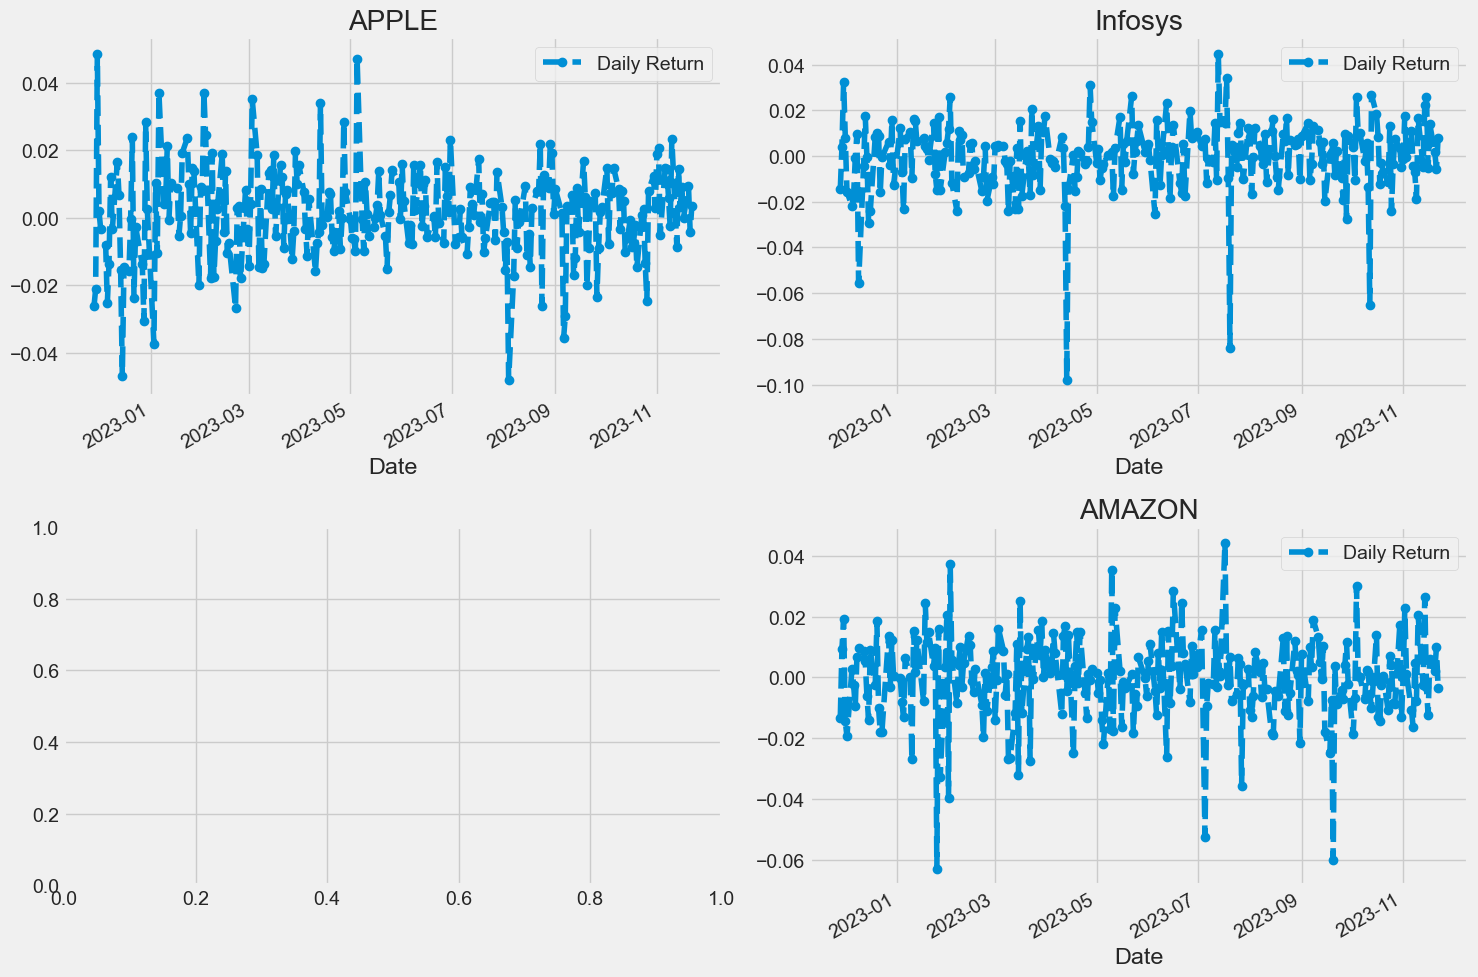

In [376]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

INFY['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Infosys')

HDB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

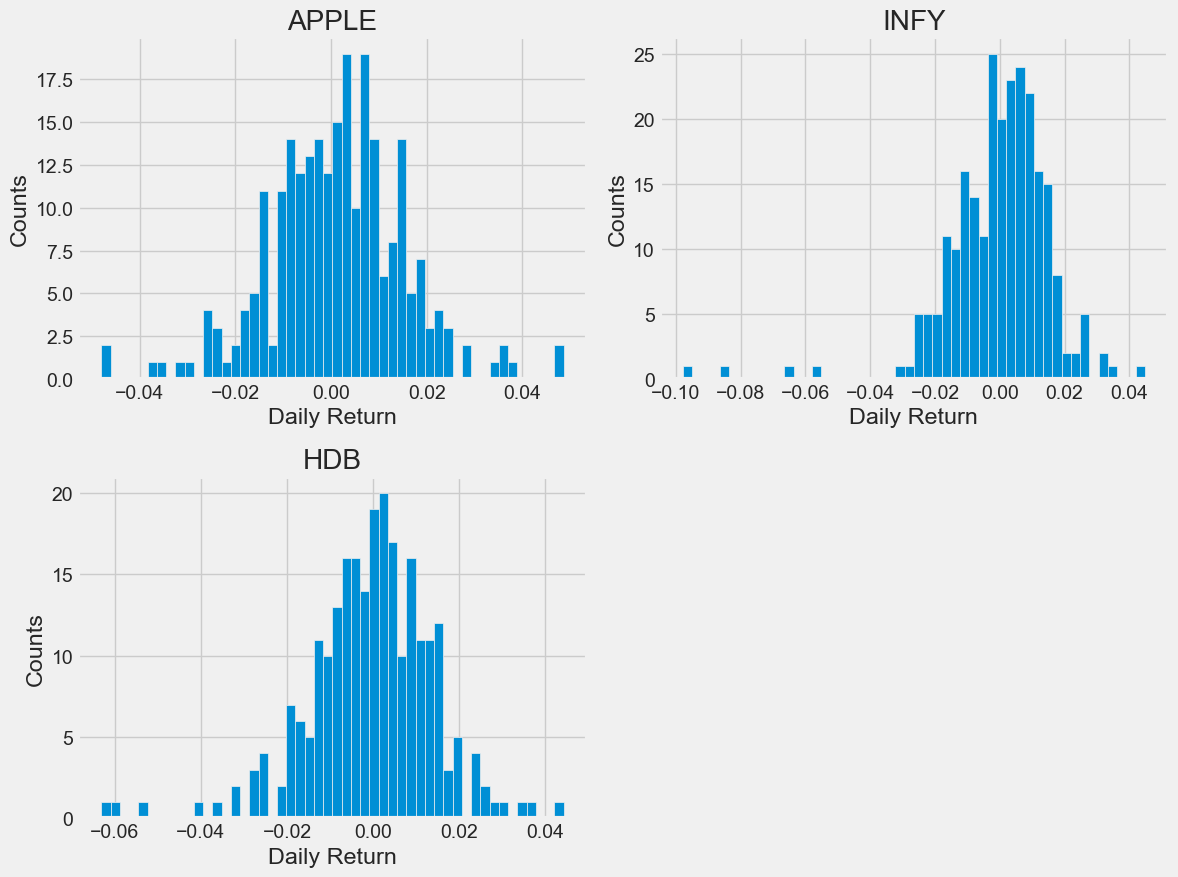

In [377]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [378]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,HDB,INFY
Date,,,
2022-11-25,NaN,NaN,NaN
2022-11-28,-0.026264,-0.013377,-0.014558
2022-11-29,-0.021148,0.009477,0.004075
2022-11-30,0.048594,0.019209,0.032471
2022-12-01,0.001892,-0.014454,0.007862


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

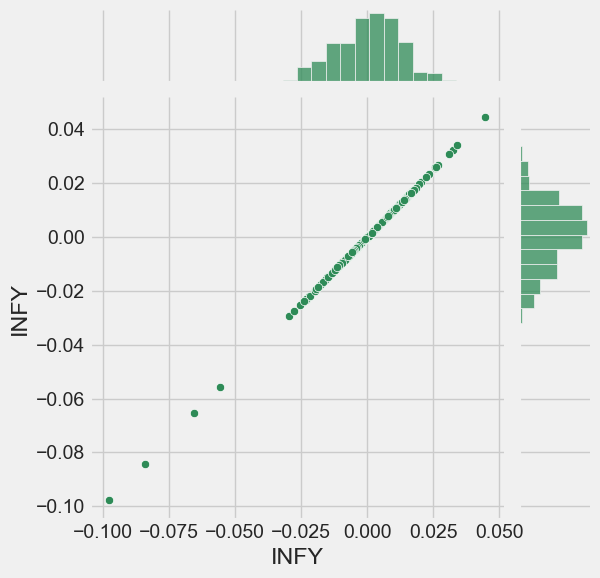

In [379]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='INFY', y='INFY', data=tech_rets, kind='scatter', color='seagreen')

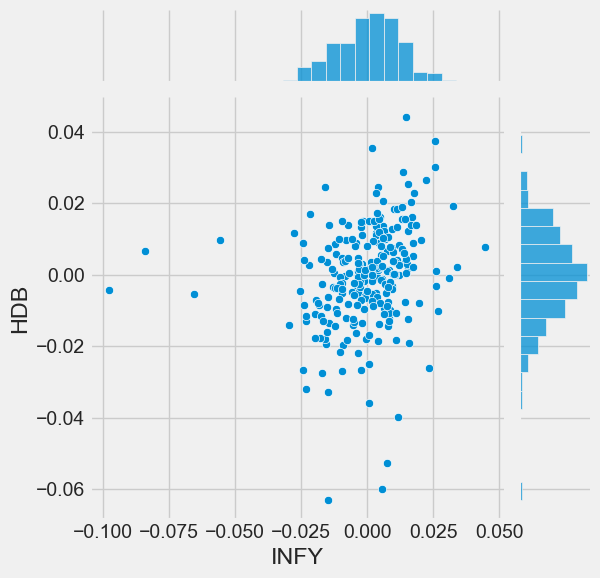

In [380]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='INFY', y='HDB', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

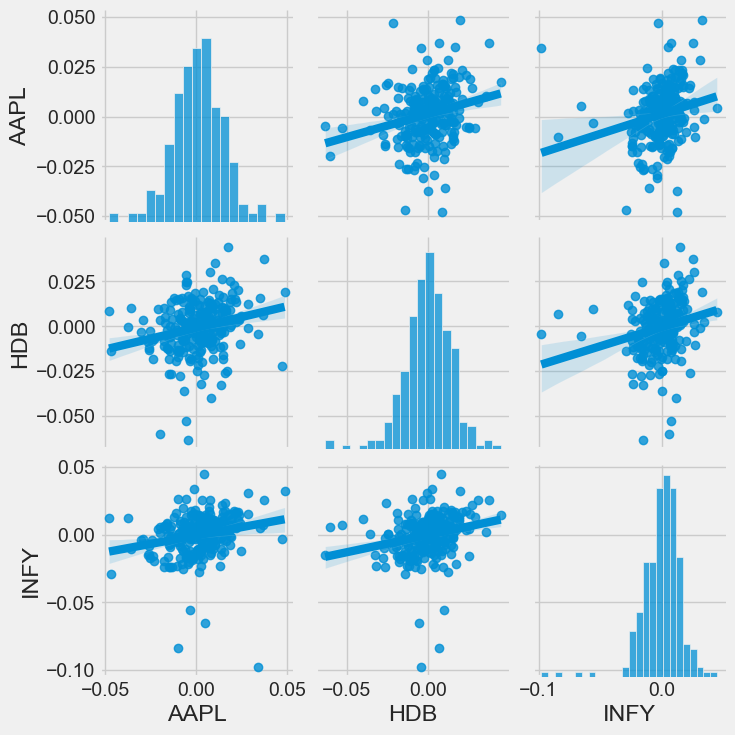

In [381]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

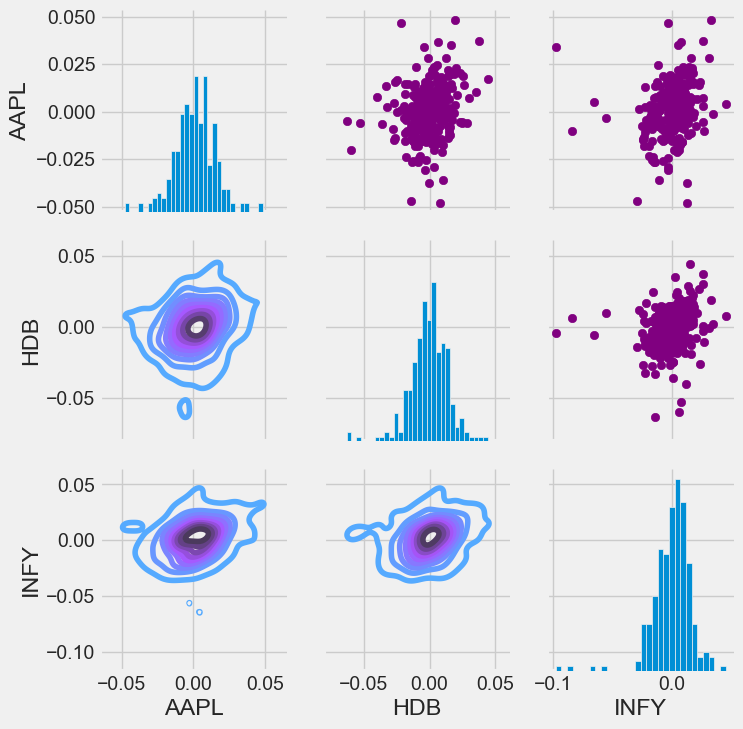

In [382]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

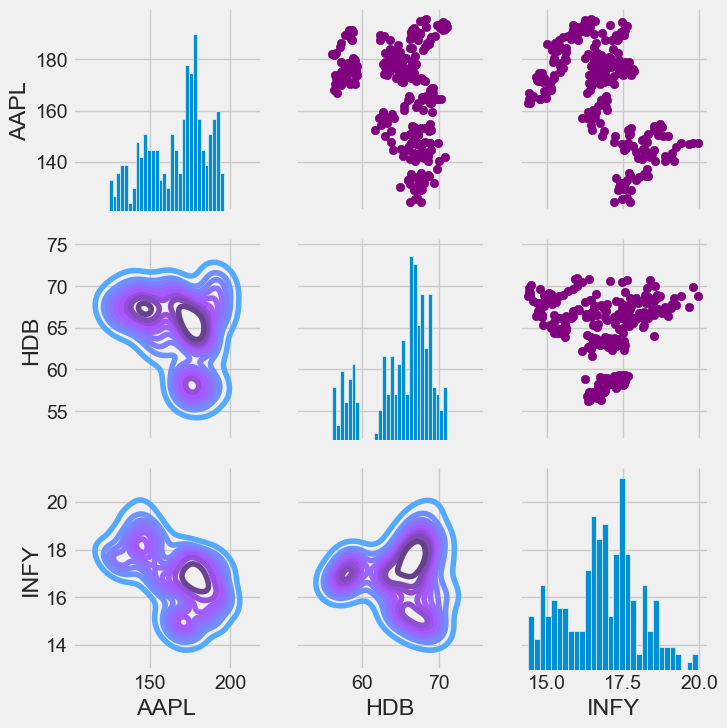

In [383]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

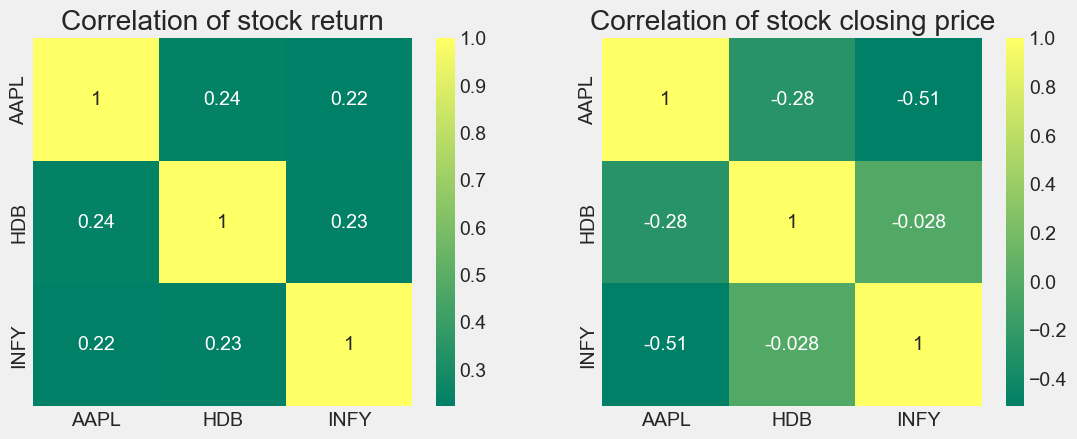

In [384]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

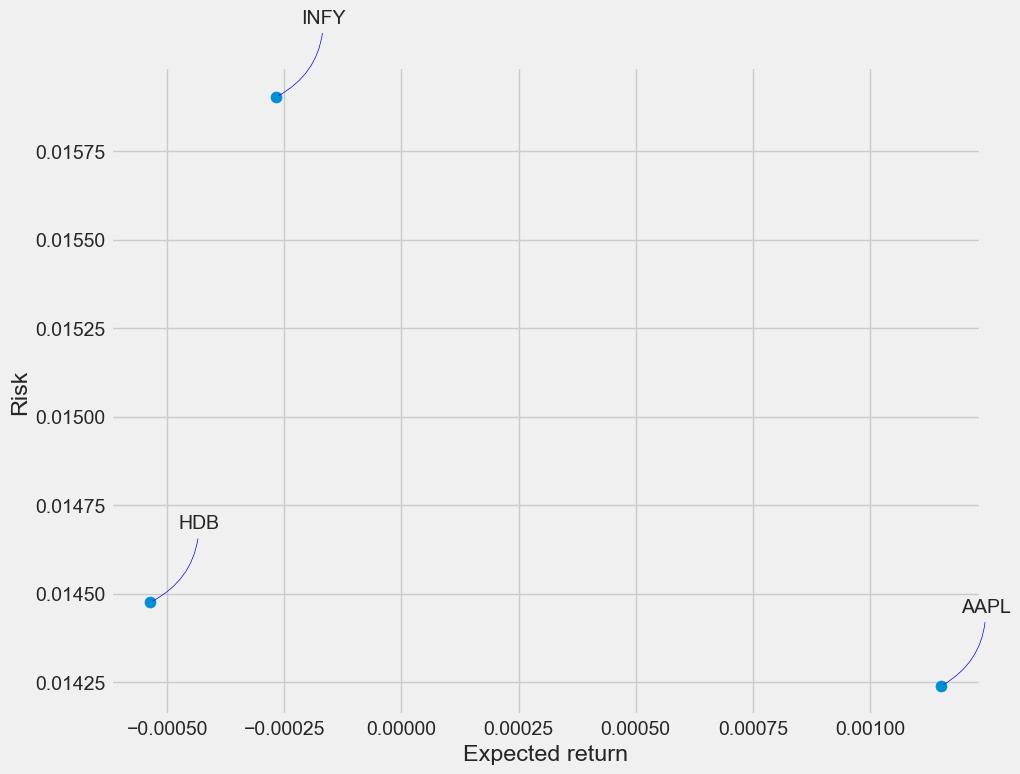

In [385]:
rets = tech_rets.dropna()

l,m,n=1,1,1

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of HDFC:

In [386]:
stock_to_be_predicted = 'HDB'
company_full_name = 'HDFC Bank'

In [387]:

df = pdr.get_data_yahoo(stock_to_be_predicted, start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,13.510000,13.610000,13.470000,13.560000,12.518307,1607400
2012-01-04,13.435000,13.800000,13.330000,13.630000,12.582929,1946800
2012-01-05,13.485000,13.680000,13.420000,13.535000,12.495228,1456200
2012-01-06,13.615000,13.660000,13.300000,13.330000,12.305977,2543600
2012-01-09,13.740000,13.780000,13.375000,13.545000,12.504459,1948000
...,...,...,...,...,...,...
2023-11-16,58.459999,58.610001,57.610001,57.790001,57.790001,1296300
2023-11-17,58.099998,58.270000,57.619999,58.139999,58.139999,1019800
2023-11-20,57.919998,58.410000,57.740002,58.270000,58.270000,1174900


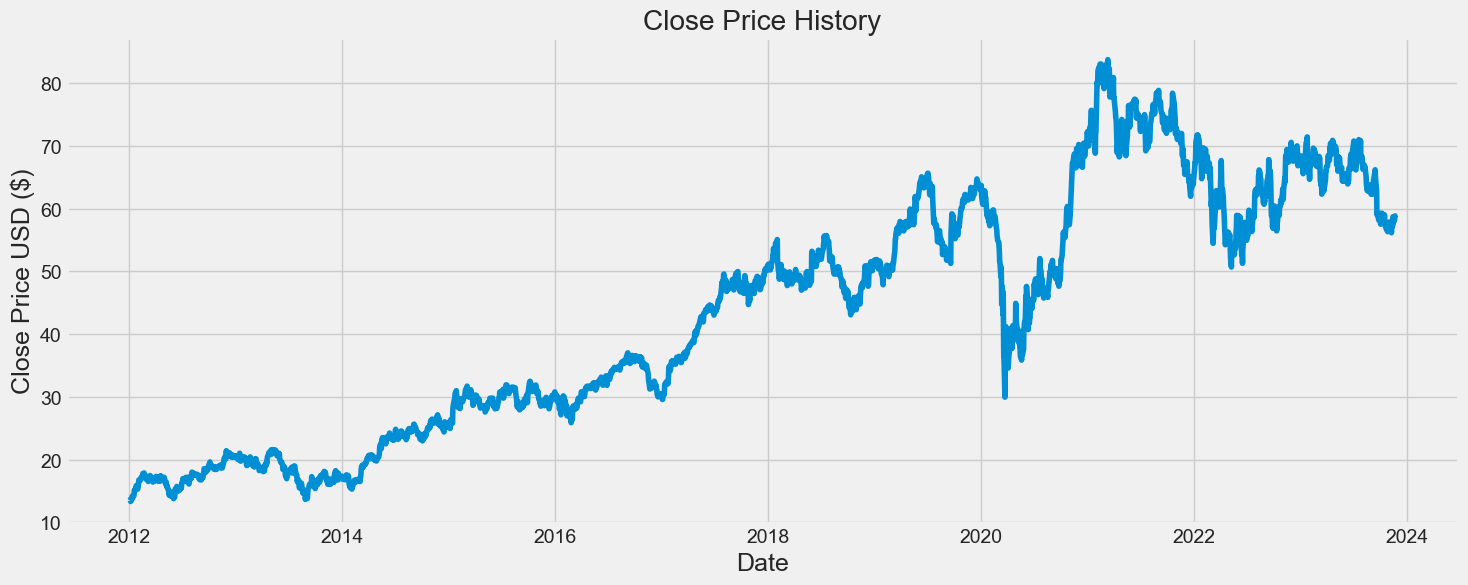

In [388]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [389]:

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .65 ))

training_data_len

1946

In [390]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00326612],
       [0.00426016],
       [0.0029111 ],
       ...,
       [0.63817098],
       [0.64640725],
       [0.64342516]])

In [391]:
event_headlines=[]
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00326612, 0.00426016, 0.0029111 , 0.        , 0.00305311,
       0.00844931, 0.01164441, 0.01008236, 0.00844931, 0.01313548,
       0.0192417 , 0.02648395, 0.02350184, 0.02612894, 0.03188015,
       0.03599829, 0.03294518, 0.03287419, 0.02804602, 0.03102812,
       0.03514627, 0.04096848, 0.04870776, 0.04941777, 0.04764271,
       0.04821074, 0.05105083, 0.05318093, 0.05637602, 0.05488497,
       0.05737008, 0.05829309, 0.06347628, 0.06447033, 0.05658905,
       0.05403295, 0.05893212, 0.05048282, 0.05779608, 0.05460096,
       0.05445897, 0.05381995, 0.05282589, 0.04529964, 0.04643568,
       0.05055381, 0.05509797, 0.05225789, 0.05871912, 0.05637602,
       0.05339393, 0.0501988 , 0.04686168, 0.04721671, 0.05076684,
       0.04395057, 0.04757172, 0.04948879, 0.05310991, 0.05211588])]
[0.046222652048283075]

[array([0.00326612, 0.00426016, 0.0029111 , 0.        , 0.00305311,
       0.00844931, 0.01164441, 0.01008236, 0.00844931, 0.01313548,
       0.0192417 , 0.02648395, 0.0

In [392]:
import numpy as np

std_deviation = np.std(df['Close'])

# Use the calculated standard deviation as the class_range
class_range = std_deviation

# Print or use the class_range as needed
print("Class Range (α):", class_range)

Class Range (α): 19.07788104074128


In [393]:

close_prices = df['Close']

# Calculate the percentage change
percentage_change = close_prices.pct_change().dropna()

# Extract the last recorded percentage change
last_price_percentage_change = percentage_change.iloc[-1]

# Print or use last_price as needed
print("Last Price percentage change:", last_price_percentage_change)

Last Price percentage change: -0.00356837875815752


In [394]:
import numpy as np

# Function to implement the Markov Chains routine
def markov_chains(data, class_range, last_price, iterations=100, nclasses=0, lucro_range=2, M_range=3, m_range=2):

    # Define the transition matrices and classes for Less Risk and More Risk strategies
    m_matrix = np.zeros((nclasses + 2, nclasses + 2))
    M_matrix = np.zeros((nclasses + 2, nclasses + 2))

    # Calculate the initial probability distributions for Less Risk and More Risk
    m_dp1 = np.zeros(nclasses + 2)
    M_dp1 = np.zeros(nclasses + 2)

    # Use previous probability distributions to determine 1st iteration estimators
    p0_1 = m_dp1[-1]
    p2_1 = M_dp1[0]
    p1_1 = 1 - p0_1 - p2_1

    # Calculate the iteration probability distributions for Less Risk and More Risk
    m_dpn = np.zeros(nclasses + 2)
    M_dpn = np.zeros(nclasses + 2)

    # Use the probability distributions to determine nth iteration estimators
    p0_n = m_dpn[-1]
    p2_n = M_dpn[0]
    p1_n = 1 - p0_n - p2_n

    # Determine the speculator's optimal strategy for each estimator
    prev_1 = calculate_game_theory_bias(last_price, class_range, p1_1, p2_1, lucro_range, M_range, m_range)
    prev_n = calculate_game_theory_bias(last_price, class_range, p1_n, p2_n, lucro_range, M_range, m_range)

    return [prev_1, prev_n, p1_1, p2_1, p1_n, p2_n, m_matrix, M_matrix]

# Now you can use this Markov Chains routine for each data point in your dataset

# 'class_range' is the range of classes as defined in the paper
# 'last_price' is the last raw price

markov_chains_results = []

for i in range(len(df)):
    last_price = df.iloc[i]['Close']
    result = markov_chains(df, class_range, last_price, iterations=100, nclasses=0, lucro_range=2, M_range=3, m_range=2)
    markov_chains_results.append(result)

# 'markov_chains_results' now contains the results for each data point


C:\Users\parth\AppData\Local\Temp\ipykernel_22976\2400543459.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  elif p2 < w / (w + y) and (p1 / p2 > (y - x) / (w + x) or p2 == 0):


In [395]:
import numpy as np

# Function to calculate the game theory bias using the estrategia function
def calculate_game_theory_bias(last_price, class_range, p1, p2, lucro_range=3, M_range=3, m_range=2):
    w = last_price * (lucro_range * class_range / 100)
    x = last_price * (m_range * class_range / 100)
    y = last_price * (M_range * class_range / 100)

    p1 = round(p1, 4)
    p2 = round(p2, 4)

    if p1 + p2 > 1 or p1 < 0 or p2 < 0:
        print("Invalid Parameters")
        return -3

    if w + x == 0 or w + y == 0:
        return 0

    if p1 + p2 < w / (w + x) and (p1 / p2 <= (y - x) / (w + x) or p1 == 0):
        return -1
    elif p2 < w / (w + y) and (p1 / p2 > (y - x) / (w + x) or p2 == 0):
        return 1
    else:
        return 0

# 'p1' and 'p2' are the market probabilities for each data point

game_theory_biases = []

for i in range(len(df)):
    last_price = df.iloc[i]['Close']  # Assuming 'Close' is the price you want to use
    result = markov_chains(df, class_range, last_price, iterations=100, nclasses=0, lucro_range=2, M_range=3, m_range=2)
    p1 = result[2]  # Replace with your data source for p1
    p2 = result[3]  # Replace with your data source for p2
    bias = calculate_game_theory_bias(last_price, class_range, p1, p2)
    game_theory_biases.append(bias)



C:\Users\parth\AppData\Local\Temp\ipykernel_22976\2400543459.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  elif p2 < w / (w + y) and (p1 / p2 > (y - x) / (w + x) or p2 == 0):


In [396]:
hunch_input = input("Enter your hunch about the stock")

In [397]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


# Path to your Chrome WebDriver executable
webdriver_path = 'chromedriver-win64\chromedriver-win64\chromedriver.exe'

# URL of the page
url = "https://www.nbcnews.com/search/?q="+company_full_name+"+Stocks"

# Configure Chrome options to run headless
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")  # To run Chrome in headless mode (no browser window)

# Create a webdriver with the configured options
service = Service(webdriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the URL
driver.get(url)

# Wait for the headline to be present and visible
headline_element = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.XPATH, '//div[@class="gs-title"]//a[@class="gs-title"]'))
)

headline_text = headline_element.text.strip()


sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(headline_text)


# Close the webdriver
driver.quit()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [398]:
major_events = ['covid','ukraine-russia-war','israel-hamas-war','employee-layoffs']

In [399]:
for event in major_events:
    url = "https://www.nbcnews.com/search/?q="+event
    # Configure Chrome options to run headless
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--headless")  # To run Chrome in headless mode (no browser window)

    # Create a webdriver with the configured options
    service = Service(webdriver_path)
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)
    headline_element = WebDriverWait(driver, 10).until(
        EC.visibility_of_element_located((By.XPATH, '//div[@class="gs-title"]//a[@class="gs-title"]'))
    )

    event_headlines.append(headline_element.text.strip())
    # Close the webdriver
    driver.quit()


In [400]:
event_headlines[0:4]

['WHO declares end to Covid global health emergency',
 "Zelenskyy says Ukraine-Russia war not a 'stalemate' in interview",
 "Poll: Biden's standing hits new lows amid Israel-Hamas war",
 'Microsoft is laying off 10,000 employees']

In [401]:
event_bias = 0

for headline in event_headlines:
    event_bias += sid.polarity_scores(headline)['compound']

In [402]:
hunch_scores = sid.polarity_scores(hunch_input)

In [403]:
final_bias = np.array(game_theory_biases) + l*scores['compound'] + m*hunch_scores['compound'] + n*event_bias

In [404]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as K

def custom_loss(final_bias):
    def loss_function(y_true, y_pred):
        # Mean Squared Error
        mse = K.mean(K.square(y_true - y_pred), axis=-1)

        # Add game theory bias
        weighted_loss = mse + final_bias

        return weighted_loss

    return loss_function

# Assuming 'game_theory_biases' is a NumPy array containing biases for each data point
game_theory_biases_array = np.array(final_bias)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=custom_loss(game_theory_biases_array))

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1886/1886 [==============================] - 46s 23ms/step - loss: -0.6711
Epoch 2/2
1886/1886 [==============================] - 46s 25ms/step - loss: -0.6717


In [405]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Print all the metrics
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

33/33 [==============================] - 2s 31ms/step
RMSE: 1.9303036020293634
MSE: 3.726071996007535
MAE: 1.5665456813750318
R2 Score: 0.9627294827805666


C:\Users\parth\AppData\Local\Temp\ipykernel_22976\1125608145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


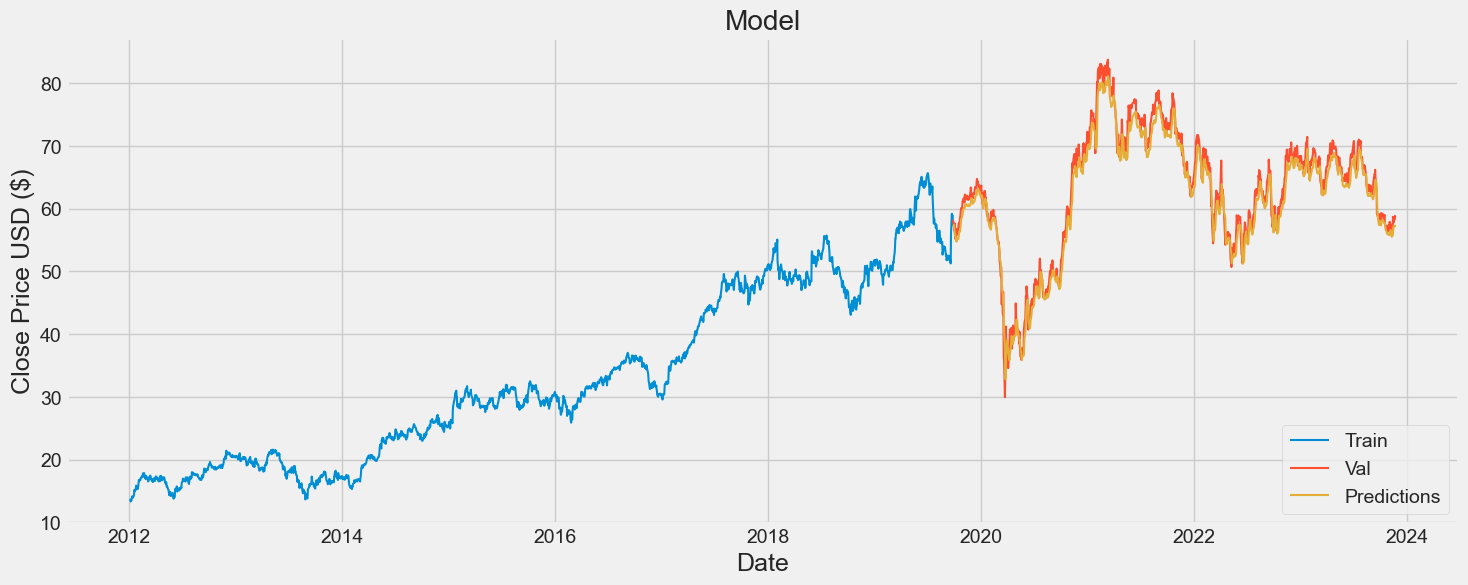

In [406]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],linewidth=1.5)
plt.plot(valid[['Close', 'Predictions']],linewidth=1.5)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [407]:
valid

,Close,Predictions
Date,,
2019-09-27,58.250000,57.450211
2019-09-30,57.049999,57.459286
2019-10-01,57.419998,56.858051
2019-10-02,56.470001,56.434891
2019-10-03,57.619999,55.856159
...,...,...
2023-11-16,57.790001,57.192673
2023-11-17,58.139999,57.197594
2023-11-20,58.270000,57.181686
